## What is the project all about? 
### building a Bank Customer Segmentation for Business insights . That means you're using data science and machine learning to help a bank better understand and serve its customers.
### My objective:
### 1. Segment (group) customers into similar behavior profiles using clustering algorithms
### 2. Provide clear visual insights into customer patterns

In [2]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
import joblib
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("D:\\bank_segmentation_project\\datasets\\CC GENERAL.csv")
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
df.shape

(8950, 18)

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df["MINIMUM_PAYMENTS"].head(10)

0     139.509787
1    1072.340217
2     627.284787
3            NaN
4     244.791237
5    2407.246035
6     198.065894
7     532.033990
8     311.963409
9     100.302262
Name: MINIMUM_PAYMENTS, dtype: float64

In [7]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [8]:
# getting to know if there are any duplicates in the dataset 
duplicates = df[df.duplicated()]
print("duplicated rows are:\n")
print(duplicates)

duplicated rows are:

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []


### Scaling the data (for numerical columns)

In [9]:
# dropping the CUST_ID becasue it is not useful it is just a identifier
df.drop('CUST_ID', axis=1, inplace=True)

In [10]:
# i need to fill the missing values in the 'MINIMUM_PAYMENTS' column 
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)     
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)                   


C:\Users\somes\AppData\Local\Temp\ipykernel_14168\2412384067.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)
C:\Users\somes\AppData\Local\Temp\ipykernel_14168\2412384067.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [11]:
# checking for any remaining missing values --> 
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# # now scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df)

In [ ]:
# # now we should always scale the data 
# joblib.dump(scaler, 'scaled_data.pkl')

['scaled_data.pkl']

In [ ]:
#after this pre-processing saving the data to a new csv file! 
# df.to_csv("D:\\bank_segmentation_project\\datasets\\bank_data.csv", index=False)

## going in for the Visualization part!

In [2]:
new_df = pd.read_csv("D:\\bank_segmentation_project\\datasets\\bank_data.csv")
new_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
new_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

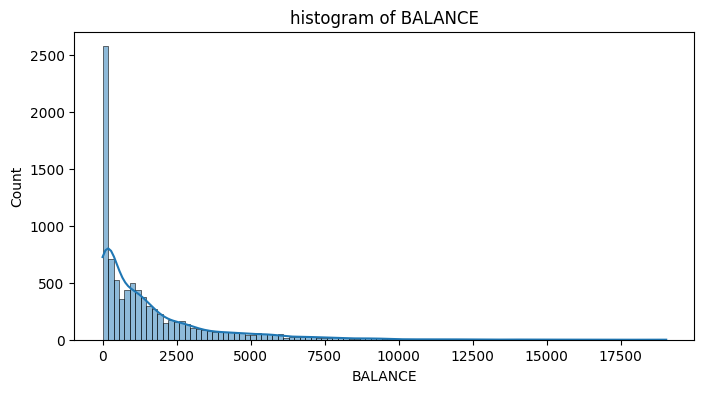

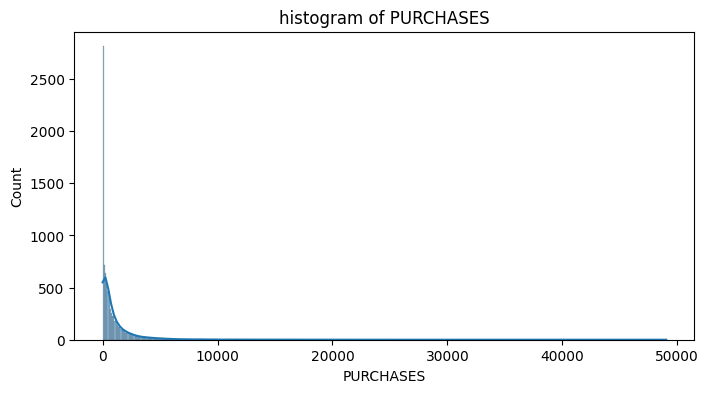

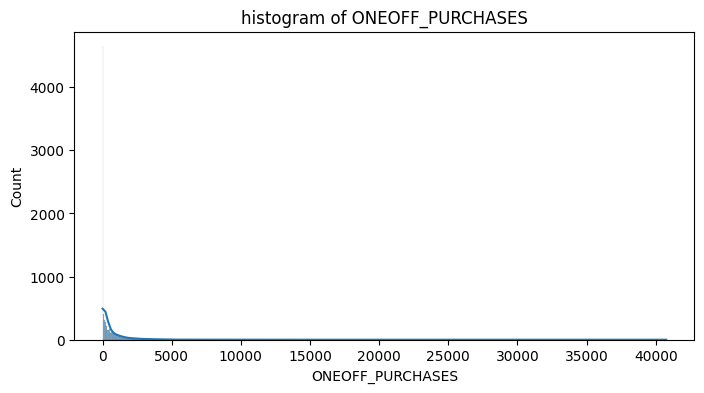

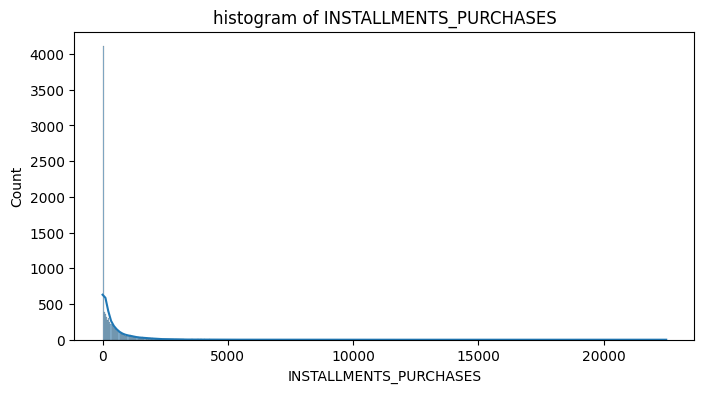

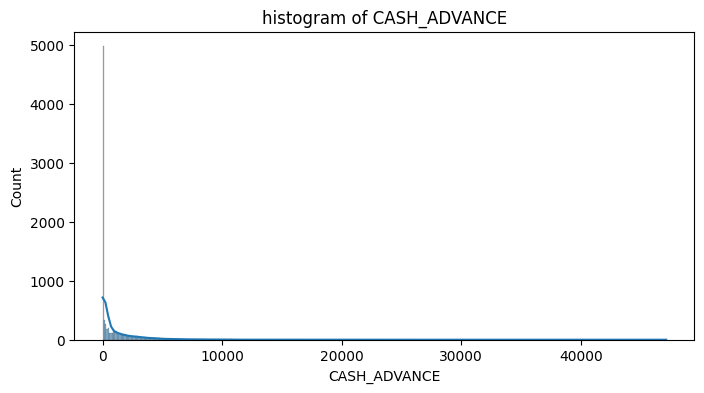

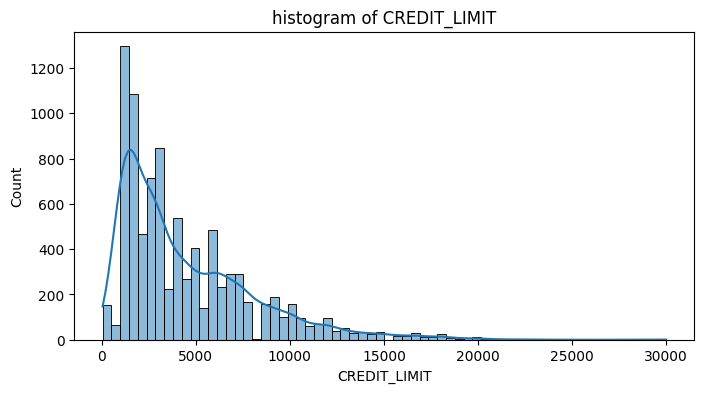

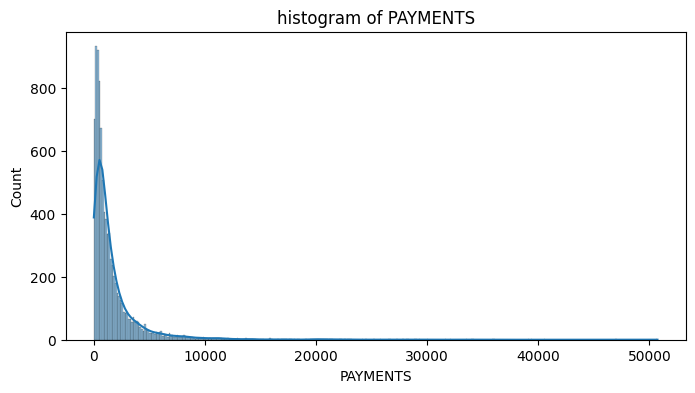

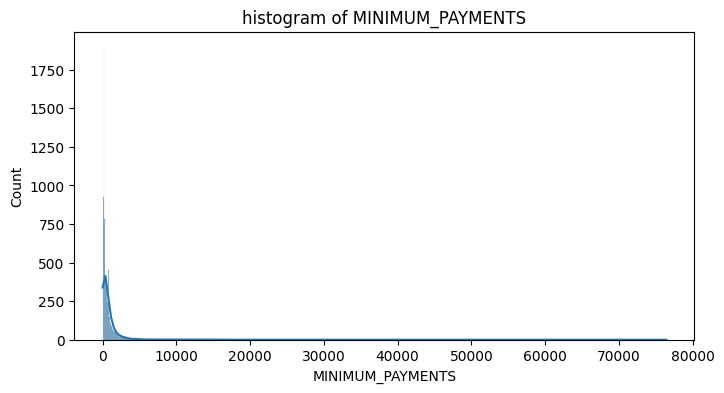

In [5]:
num_cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
            'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(new_df[col], kde=True)
    plt.title(f"histogram of {col}")
    plt.show()

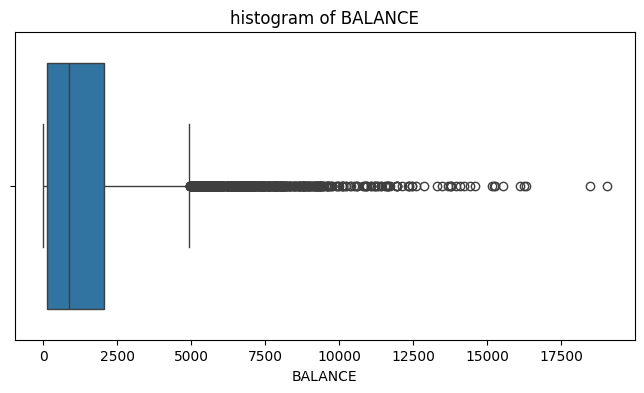

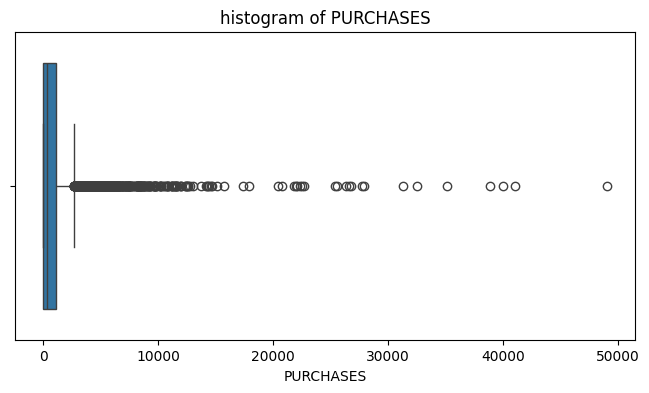

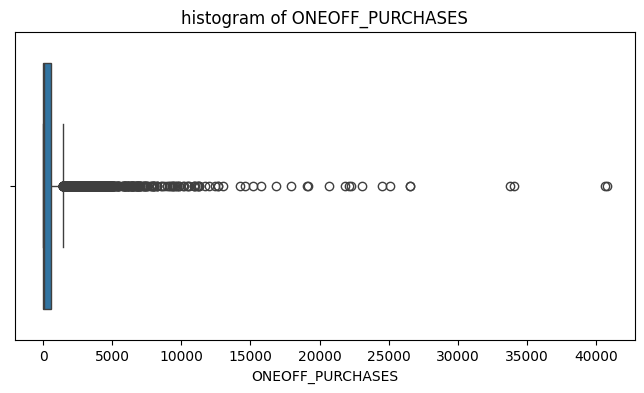

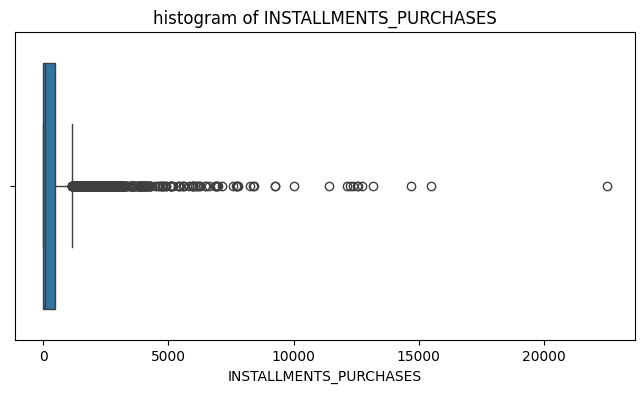

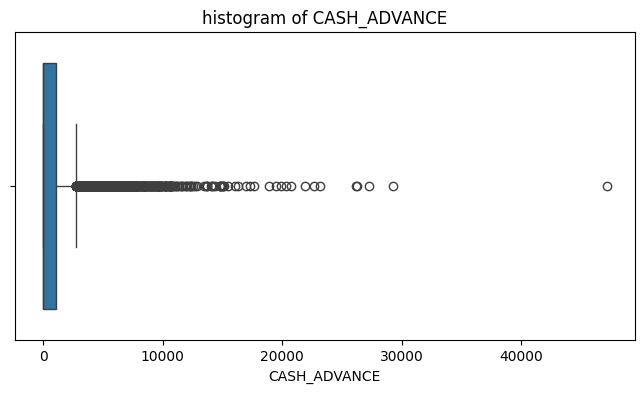

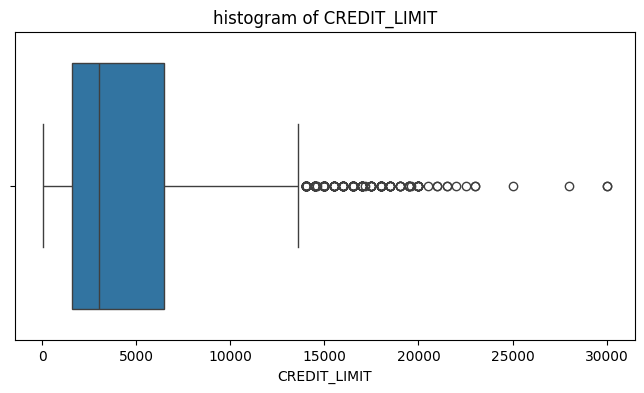

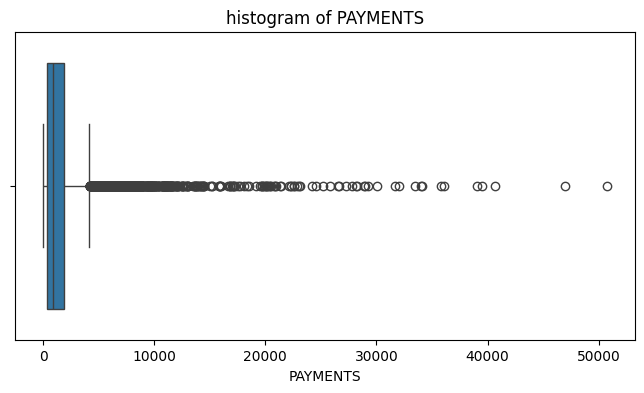

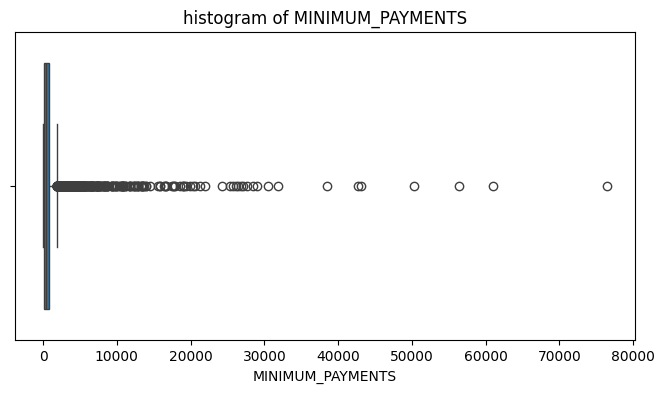

In [7]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=new_df[col])
    plt.title(f"histogram of {col}")
    plt.show()

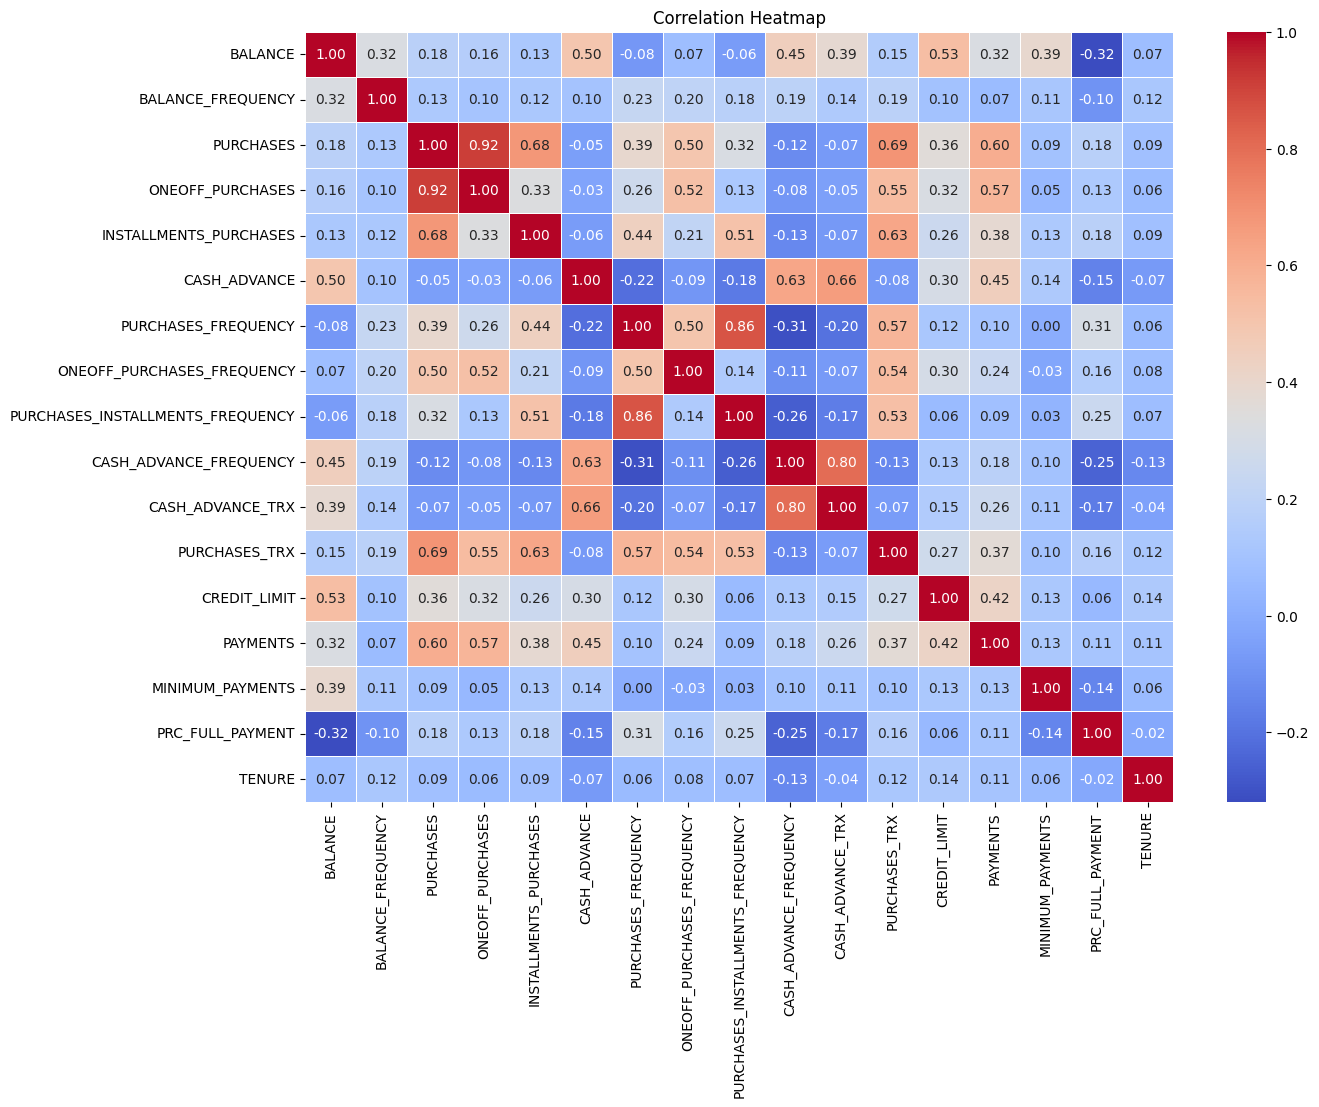

In [9]:
plt.figure(figsize=(14, 10))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

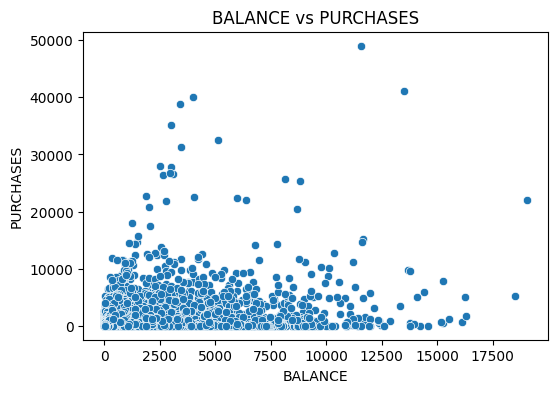

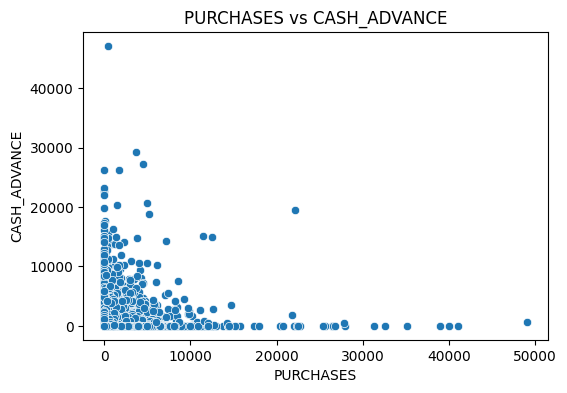

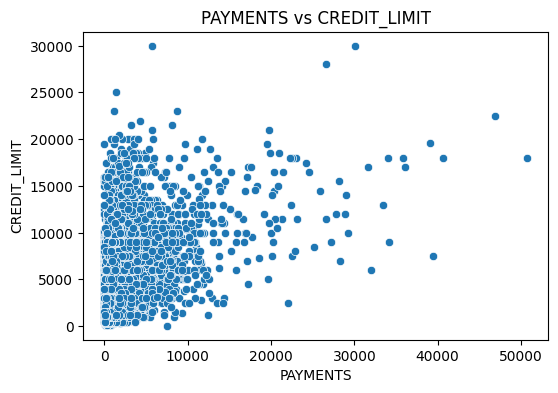

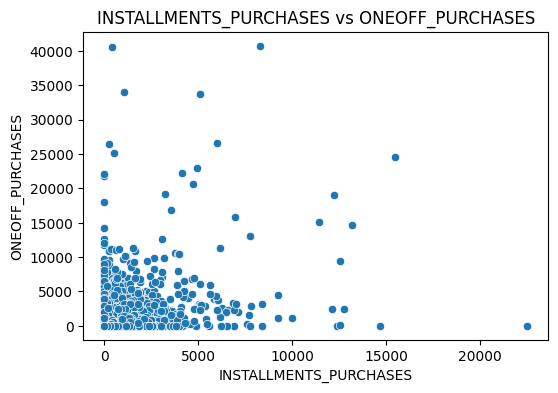

In [10]:
scatter_pairs = [
    ('BALANCE', 'PURCHASES'),
    ('PURCHASES', 'CASH_ADVANCE'),
    ('PAYMENTS', 'CREDIT_LIMIT'),
    ('INSTALLMENTS_PURCHASES', 'ONEOFF_PURCHASES')
]

for x, y in scatter_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=new_df, x=x, y=y)
    plt.title(f'{x} vs {y}')
    plt.show()

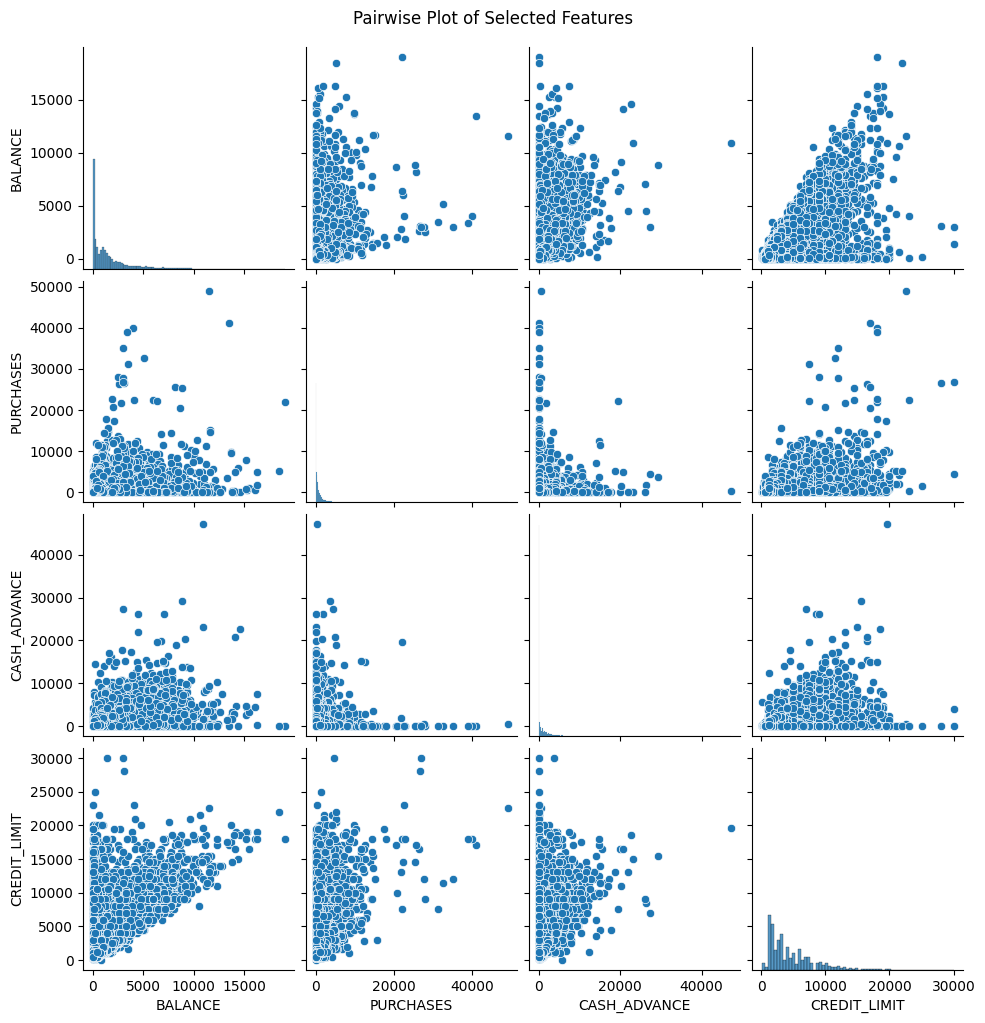

In [11]:
selected_cols = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT']
sns.pairplot(new_df[selected_cols])
plt.suptitle("Pairwise Plot of Selected Features", y=1.02)
plt.show()

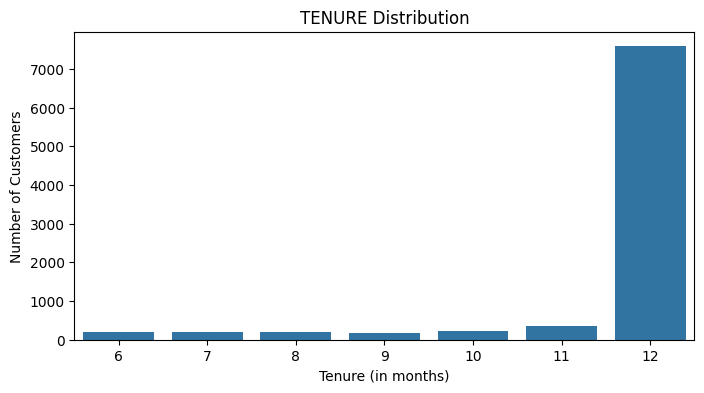

In [12]:
plt.figure(figsize=(8, 4))
sns.countplot(x=new_df['TENURE'])
plt.title('TENURE Distribution')
plt.xlabel('Tenure (in months)')
plt.ylabel('Number of Customers')
plt.show()

### Before the outlier removal we need to take care of the highly skewed data in the end that we can easily spot using a histogram 
### now after we see all the long tails in the end of the highly skewed histograms in the end of the graph we need to remove it not one by one, we can always use the power of python 
### to perform the log transformation on the data in one go!
### Also, log transformation is important when working on bank data or working on finance topics why?
### most of the people save a lot of my money thus making very less high value purchases, and only very few people buy a lot of high priced stuff 
### thus skewing the data on one side, here it is right-skewed!

In [14]:
cols_to_log =['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
new_df[cols_to_log] = new_df[cols_to_log].apply(np.log1p)

### ploting the histogram after the log transformation for clustering!

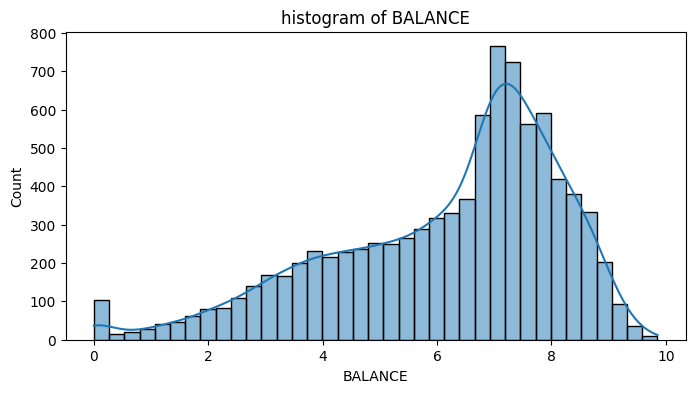

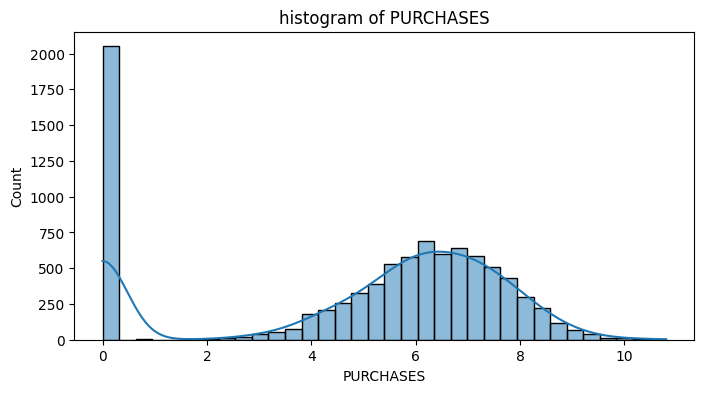

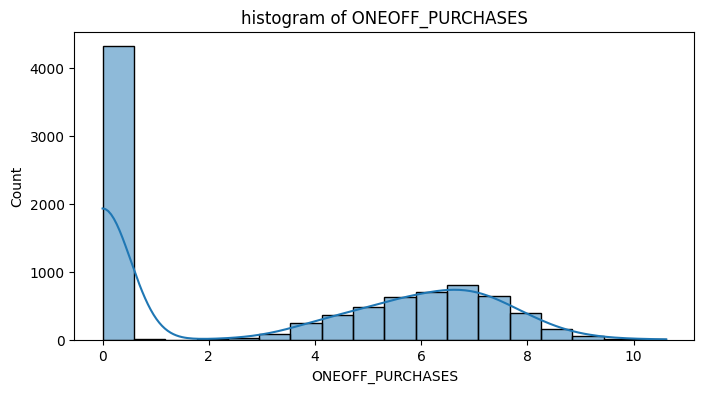

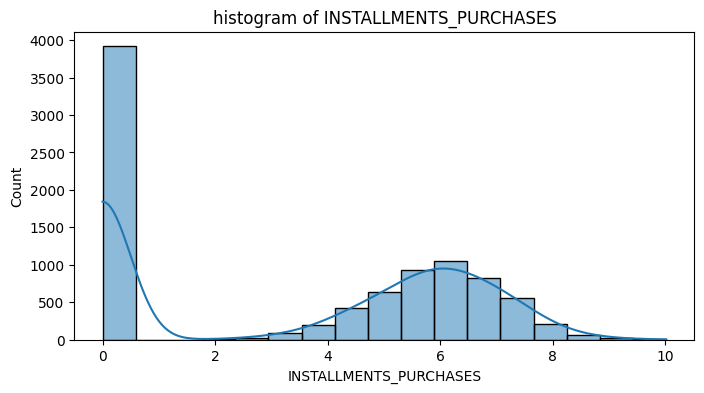

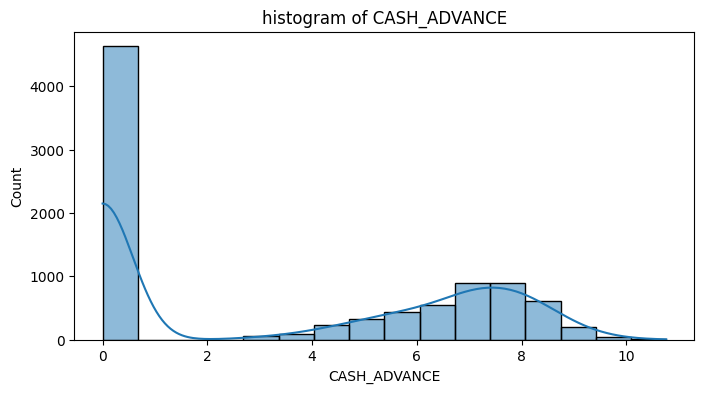

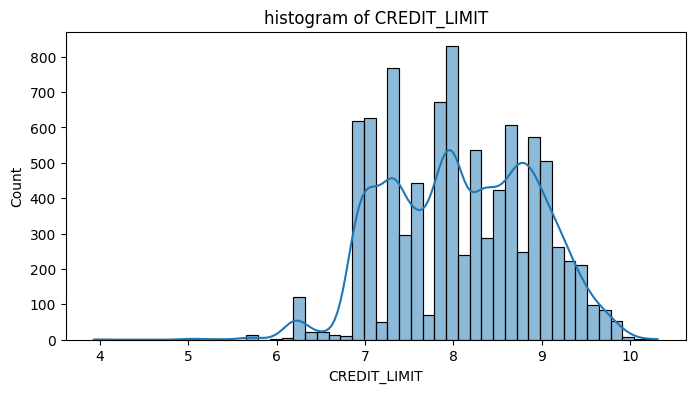

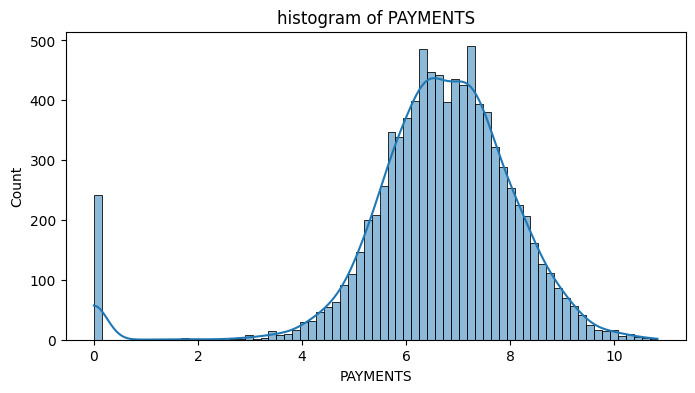

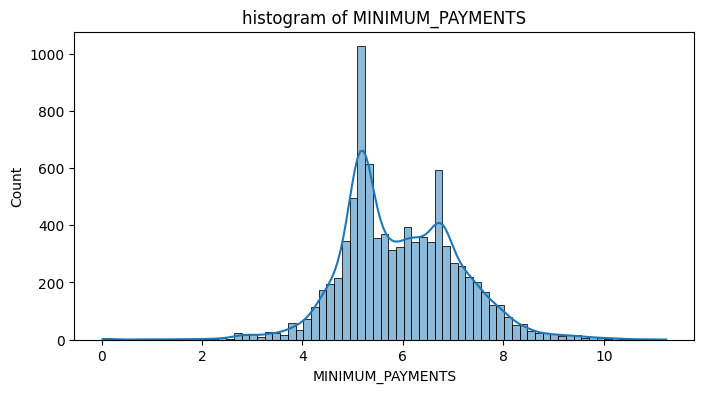

In [15]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(new_df[col], kde=True)
    plt.title(f"histogram of {col}")
    plt.show()

### Again checking for the outliers!

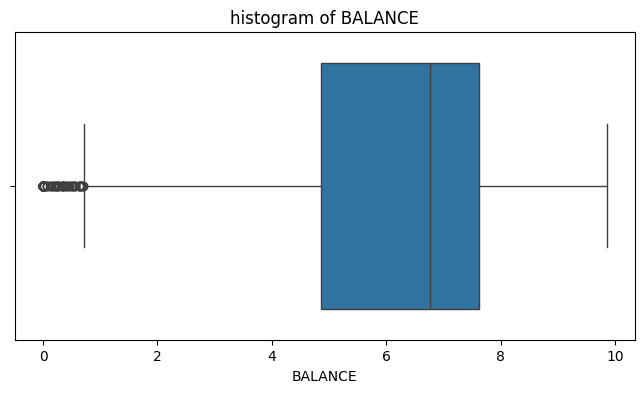

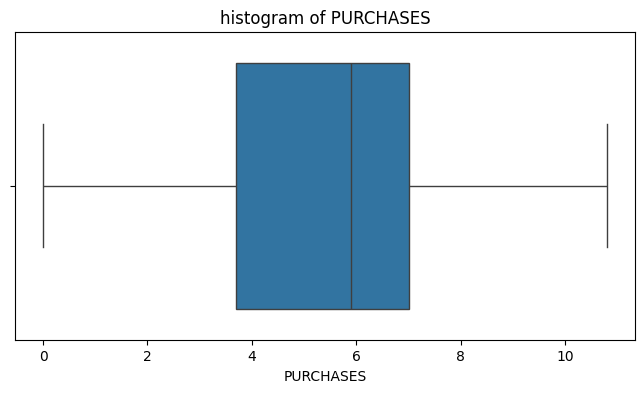

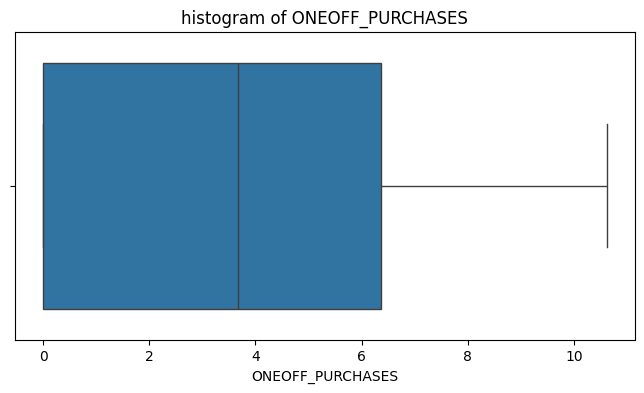

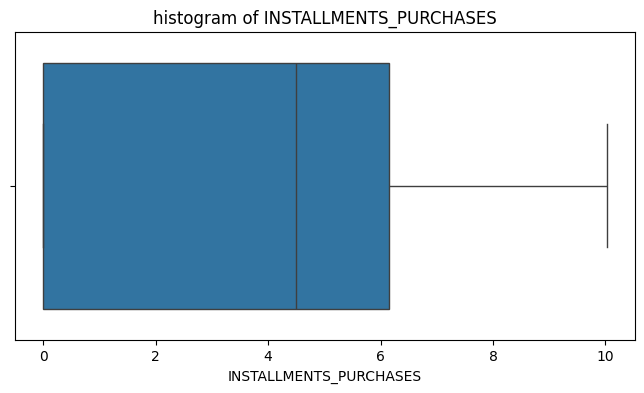

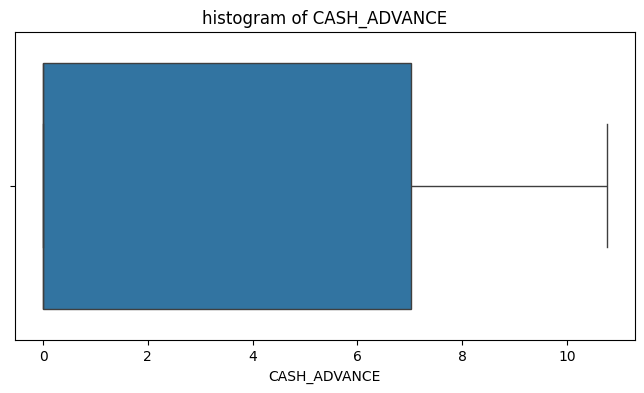

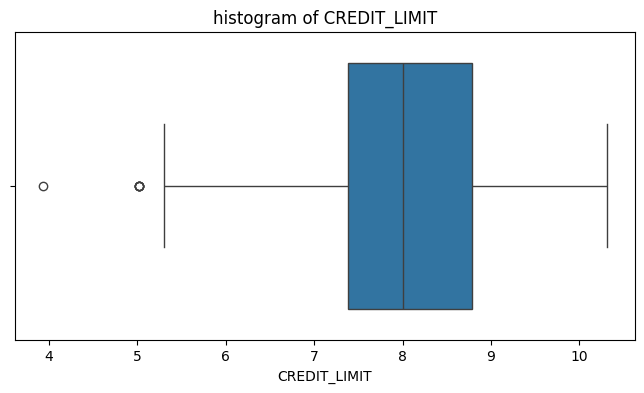

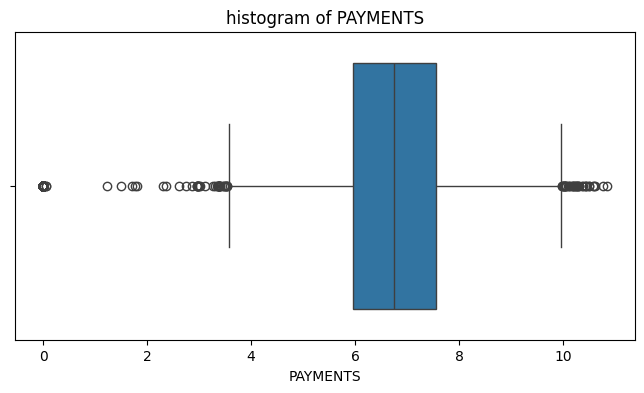

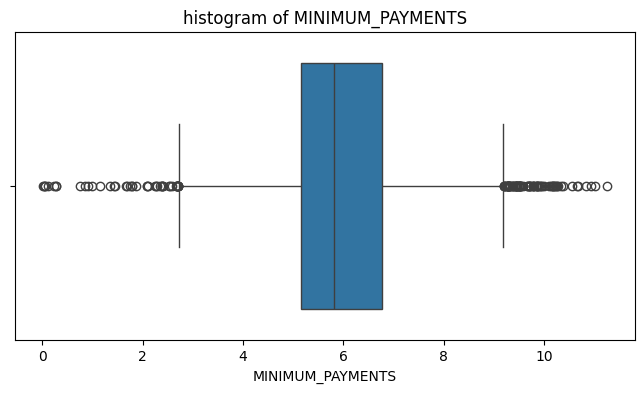

In [16]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=new_df[col])
    plt.title(f"histogram of {col}")
    plt.show()

### Removing the outliers using IQR method and then again plotting to see the results!

In [17]:
cols_with_outliers = ['BALANCE','MINIMUM_PAYMENTS','PAYMENTS']
for col in cols_with_outliers:
    Q1 = new_df[col].quantile(0.25)
    Q3 = new_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    new_df = new_df[(new_df[col] >= lower_bound) & (new_df[col] <= upper_bound)]

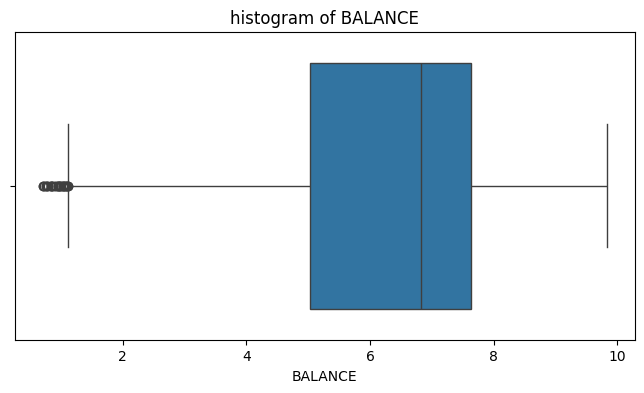

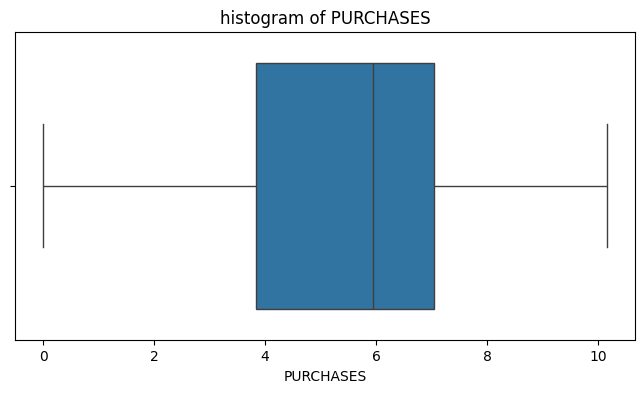

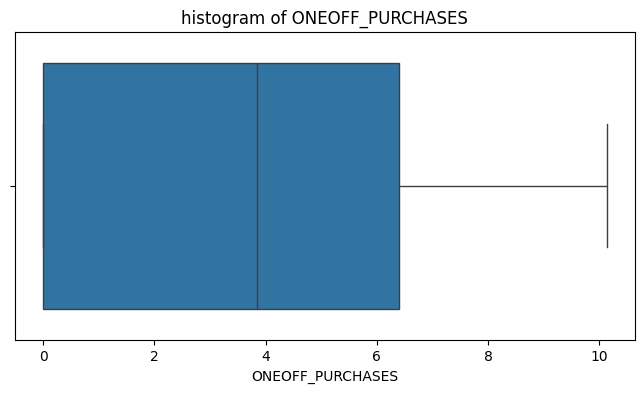

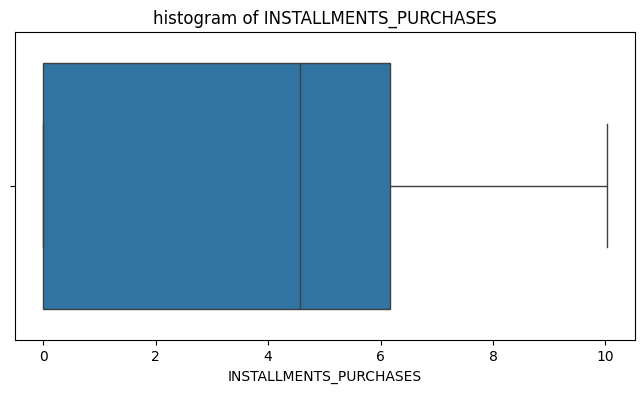

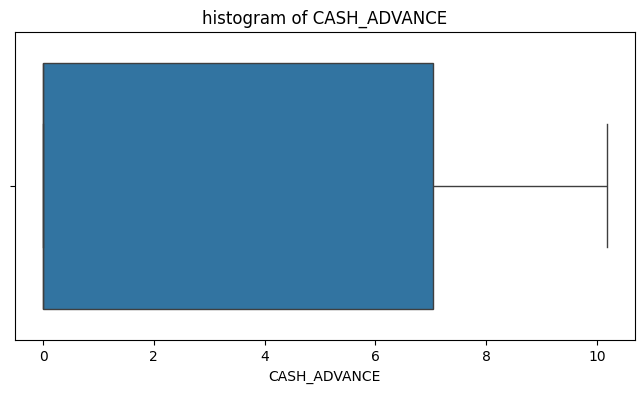

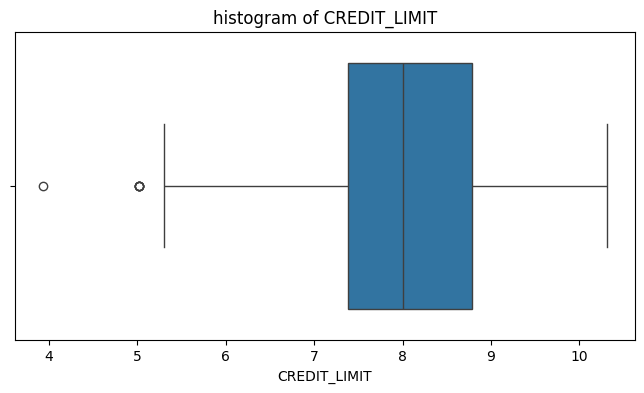

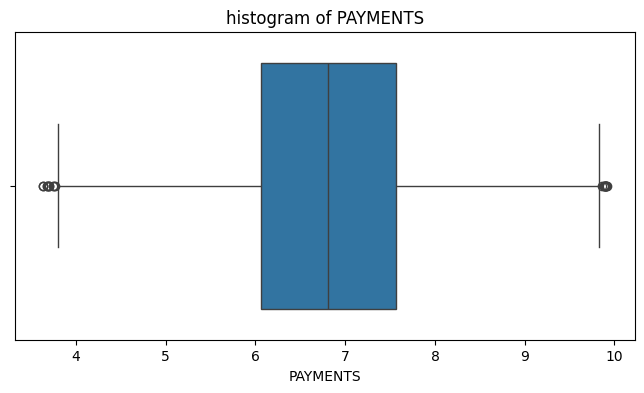

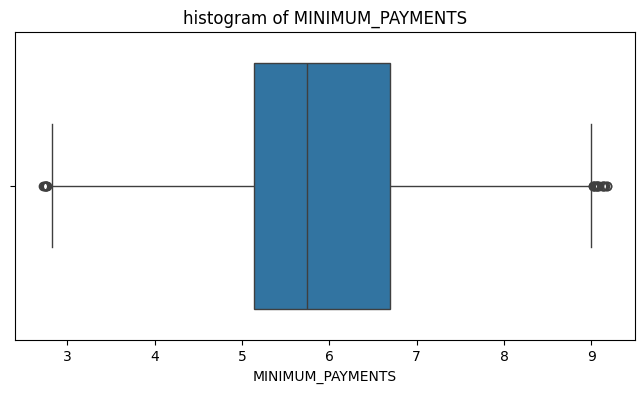

In [18]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=new_df[col])
    plt.title(f"histogram of {col}")
    plt.show()

In [5]:
cleaned_df = pd.read_csv("D:\\bank_segmentation_project\\cleaned_bank_data.csv")
cleaned_df

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,6.908755,5.312231,4.945277,0.000000,12
1,1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,4,0,8.853808,8.319725,6.978531,0.222222,12
2,2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,8.922792,6.434654,6.442994,0.000000,12
3,4,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,7.090910,6.521114,5.504483,0.000000,12
4,5,7.501540,1.000000,7.196147,0.000000,7.196147,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,7.496097,7.244983,7.786654,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8435,8945,3.384170,1.000000,5.677165,0.000000,5.677165,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,6.908755,5.788719,3.909748,0.500000,6
8436,8946,3.004851,1.000000,5.707110,0.000000,5.707110,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,6.908755,5.623517,6.762968,0.000000,6
8437,8947,3.194529,0.833333,4.979489,0.000000,4.979489,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,6.908755,4.410016,4.423869,0.250000,6
8438,8948,2.671218,0.833333,0.000000,0.000000,0.000000,3.625907,0.000000,0.000000,0.000000,0.166667,2,0,6.216606,3.980615,4.038755,0.250000,6


### Now entering into the model training phase ! 

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cleaned_df)

### Customer Segmentation Part --> 

In [7]:
# apply the elbow method --> 
def perform_kmeans(X_scaled, n_clusters = 4):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    return kmeans.labels_, kmeans

In [8]:
def eval_kmeans(X_scaled, max_k = 10):
    inertia = []
    silhouette = []

    for k in range(2, max_k):
        #first we train the kmeans and then fit the lables with the current k
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X_scaled)
        # then we need to save the inertia (sum of the dist from centroids)
        inertia.append(kmeans.inertia_)
        # then save the silhouette score
        # measure of how well separated clusters are
        silhouette.append(silhouette_score(X_scaled, labels))

    plt.figure(figsize=(12,5))
    # plotting the inertia -> (elbow method)
    plt.subplot(1,2,1)
    plt.plot(range(2,max_k), inertia, marker='o')
    plt.title("Elbow method")
    plt.xlabel("number of clusters(k)")
    plt.ylabel("inertia(WCSS)")

    # plotting the silhouettes-->
    plt.subplot(1,2,2)
    plt.plot(range(2, max_k), silhouette, marker='o', color='red')
    plt.title("silhouette score")
    plt.xlabel("number of the clusters")
    plt.ylabel("score")

    plt.tight_layout()
    plt.show()

In [9]:
# we want to visualize the clusters in 2D so we will use PCA
def visualize_clusters(X_scaled, cluster_labels):
    # reducing the dimensions to 2 principal components only!
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # create dataframe with PCA features and cluster labels
    df_viz = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
    df_viz['cluster'] = cluster_labels

    # plot 2d clusters
    plt.figure(figsize=(8,6))
    sns.scatterplot(data = df_viz, x='PCA1', y='PCA2', hue='cluster', palette='tab10')
    plt.title("customer segments (PCA visualization)")
    plt.grid(True)
    plt.show()

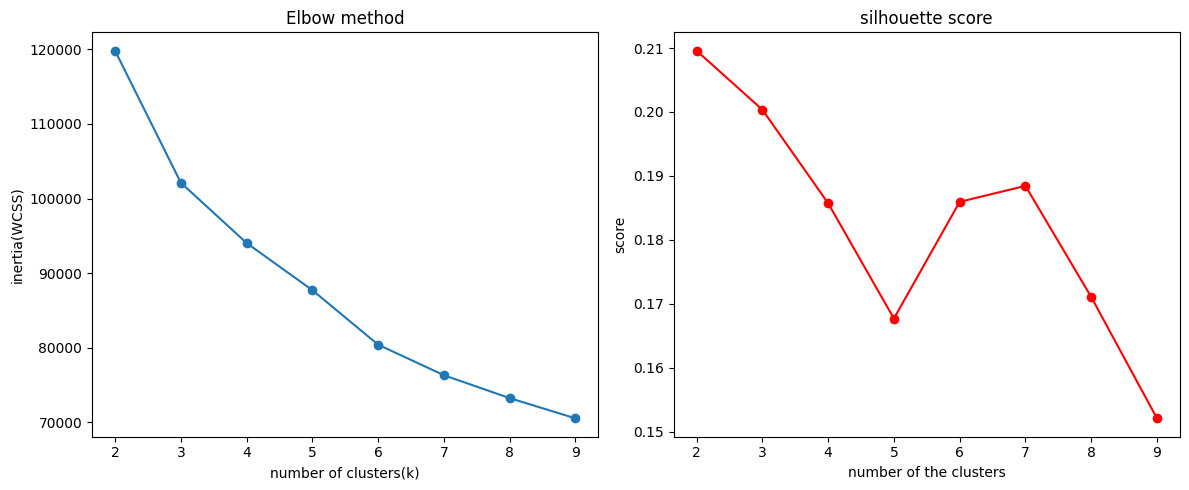

In [10]:
eval_kmeans(X_scaled, max_k=10)

In [11]:
cluster_labels, kmeans_model = perform_kmeans(X_scaled)

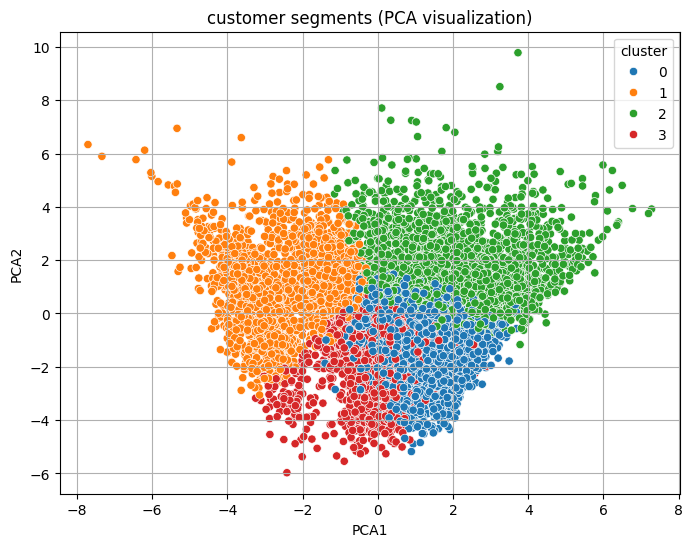

In [12]:
visualize_clusters(X_scaled, cluster_labels)

In [13]:
# we now have a dataframe where each customer is assigned a cluster number!!! 
# now we can analyze each cluster and give it a real world name!! 

# now we will name our clusters! 
cleaned_df['cluster'] = cluster_labels
cluster_summary = cleaned_df.groupby('cluster').mean()
print(cluster_summary)

          Unnamed: 0   BALANCE  BALANCE_FREQUENCY  PURCHASES  \
cluster                                                        
0        5577.484319  5.013423           0.917815   6.136723   
1        4396.132933  7.494758           0.951871   1.787381   
2        3454.610550  7.111415           0.983415   7.542133   
3        4693.935835  4.719634           0.678122   5.161487   

         ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
cluster                                                           
0                1.178996                6.026987      0.877975   
1                1.372053                0.637763      6.992233   
2                6.718405                5.638587      2.758077   
3                4.172677                1.722349      1.148834   

         PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
cluster                                                    
0                   0.823625                    0.043114   
1                   0.093594    

In [14]:
map_labels = {
    0:'Cash Advance Lovers',
    1:'Big Spenders',
    2:'Inactive Customers',
    3:'EMI Users'
}
cleaned_df['Segment'] = cleaned_df['cluster'].map(map_labels)

### Recommendation System for getting the Bank Customers! (User based collaborative filtering)

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
# creating a user-item interaction matrix! 
# for that we;re simulating 10 users and 5 products! 
# so in this recommendation system we need to recommend products to a user based on similar users behaviours
# we need to identify -> 
# 1. understand how the users behave, 2. find the users who behave similarly and 3. use their preferences to suggest new items to the target user

In [16]:
cleaned_df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,Segment
0,0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.00,0,2,6.908755,5.312231,4.945277,0.000000,12,3,EMI Users
1,1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.25,4,0,8.853808,8.319725,6.978531,0.222222,12,1,Big Spenders
2,2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.00,0,12,8.922792,6.434654,6.442994,0.000000,12,2,Inactive Customers
3,4,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.00,0,1,7.090910,6.521114,5.504483,0.000000,12,3,EMI Users
4,5,7.501540,1.000000,7.196147,0.000000,7.196147,0.000000,0.666667,0.000000,0.583333,0.00,0,8,7.496097,7.244983,7.786654,0.000000,12,0,Cash Advance Lovers


In [17]:
# cleaned_df.to_csv('customer_segments.csv', index=False)

#### performing data visualization! 

In [19]:
segmented_df = pd.read_csv('D:\\bank_segmentation_project\\customer_segments.csv')
segmented_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,Segment
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.00,0,2,6.908755,5.312231,4.945277,0.000000,12,3,EMI Users
1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.25,4,0,8.853808,8.319725,6.978531,0.222222,12,1,Big Spenders
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.00,0,12,8.922792,6.434654,6.442994,0.000000,12,2,Inactive Customers
3,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.00,0,1,7.090910,6.521114,5.504483,0.000000,12,3,EMI Users
4,7.501540,1.000000,7.196147,0.000000,7.196147,0.000000,0.666667,0.000000,0.583333,0.00,0,8,7.496097,7.244983,7.786654,0.000000,12,0,Cash Advance Lovers


C:\Users\somes\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


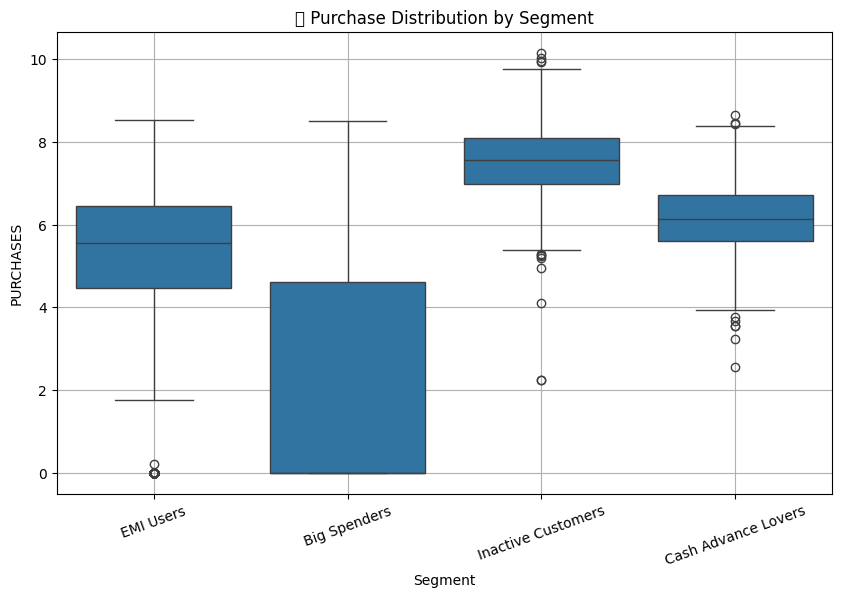

In [20]:
# visualizing the spending behaviours by segments that we created 
plt.figure(figsize=(10,6))
sns.boxplot(data=segmented_df, x='Segment', y='PURCHASES')
plt.title('🛍️ Purchase Distribution by Segment')
plt.xticks(rotation=20)
plt.grid(True)
plt.show()


C:\Users\somes\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


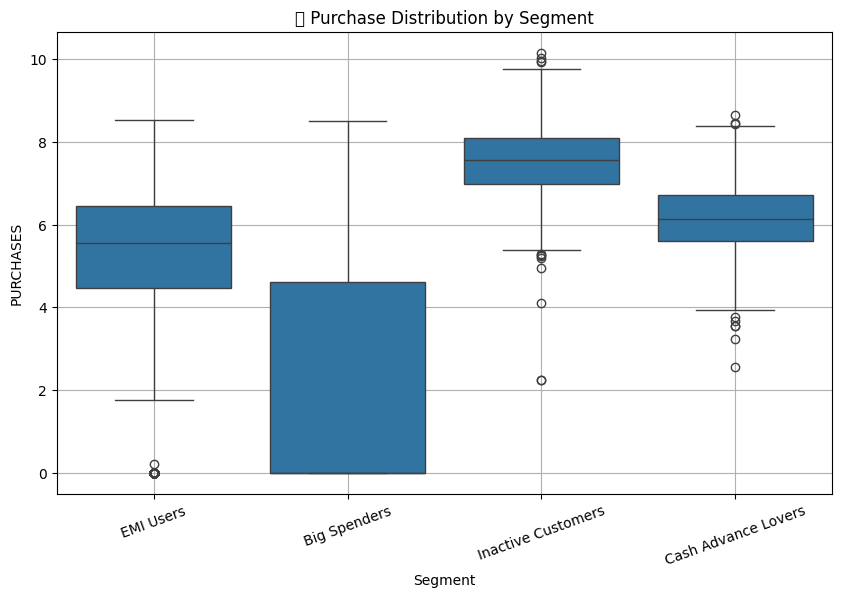

In [21]:
# visualizing the spending behaviours by segments that we created 
plt.figure(figsize=(10,6))
sns.boxplot(data=segmented_df, x='Segment', y='PURCHASES')
plt.title('🛍️ Purchase Distribution by Segment')
plt.xticks(rotation=20)
plt.grid(True)
plt.show()


[]

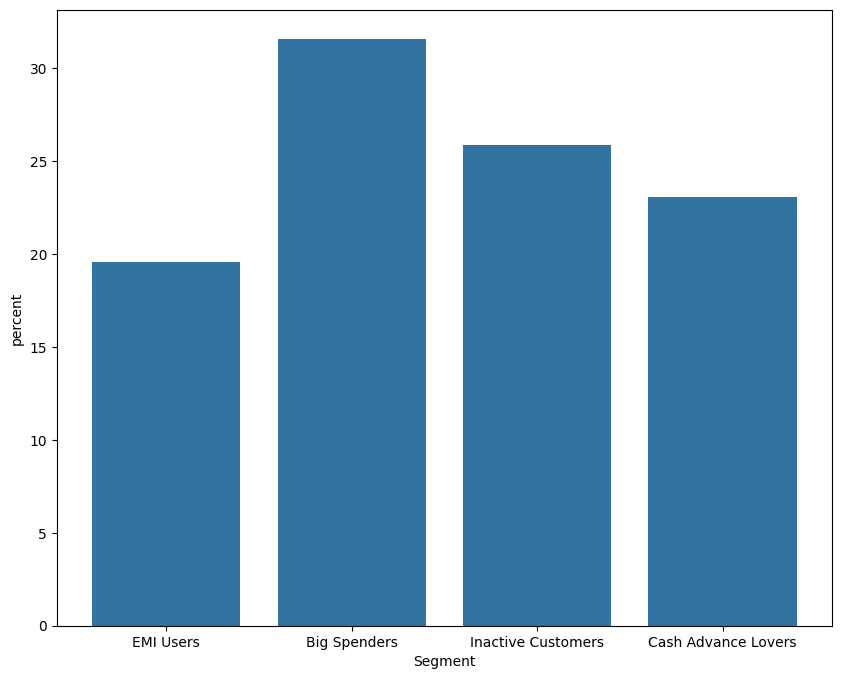

In [22]:
# according to the segments that we made 
# I'm plotting how many percent of each segment of the people are there! 

plt.figure(figsize=(10,8))
sns.countplot(data = segmented_df, x='Segment', stat='percent')
plt.plot()

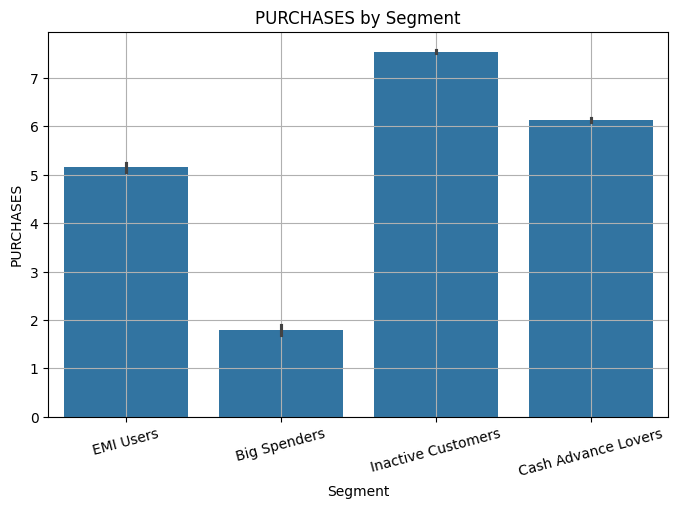

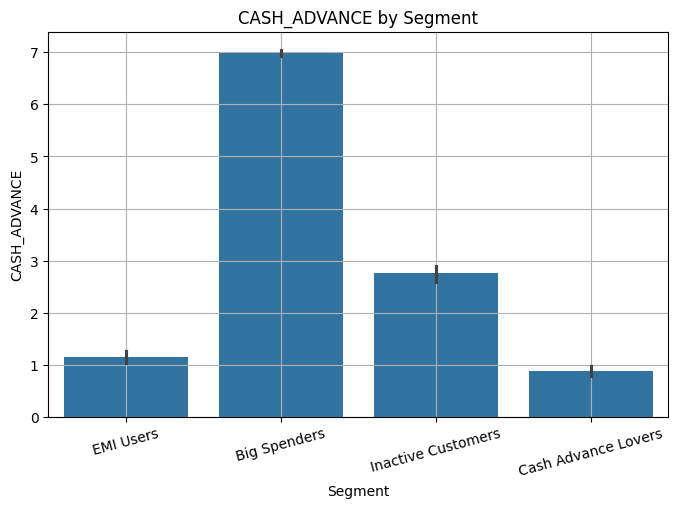

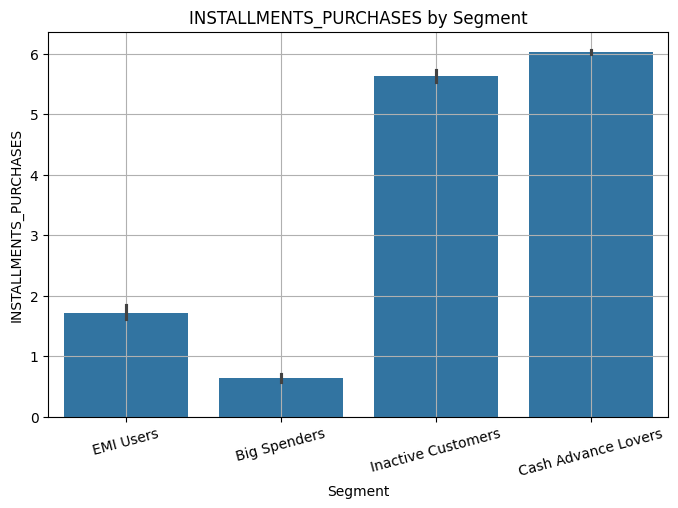

In [23]:
features = ['PURCHASES', 'CASH_ADVANCE', 'INSTALLMENTS_PURCHASES']
for feature in features:
    plt.figure(figsize=(8,5))
    sns.barplot(data=segmented_df, x='Segment', y=feature, estimator='mean')
    plt.title(f'{feature} by Segment')
    plt.xticks(rotation=15)
    plt.grid(True)
    plt.show()

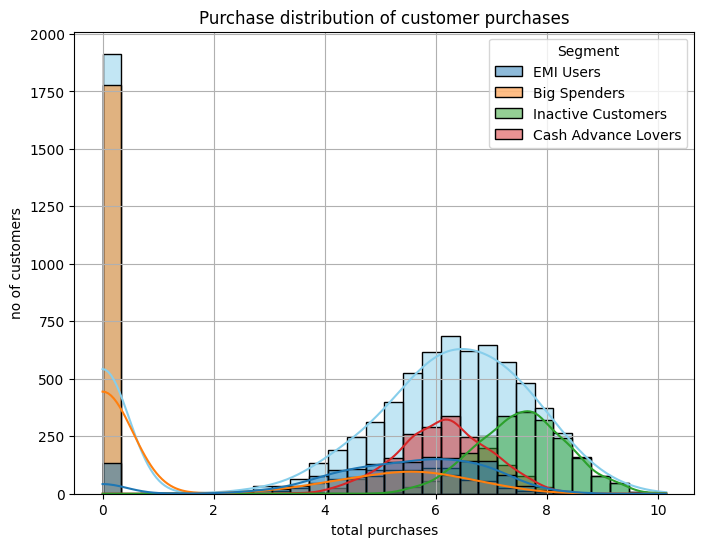

In [24]:
# what is the distribution of a numeric feature
plt.figure(figsize=(8,6))
sns.histplot(data=segmented_df,x='PURCHASES', bins=30, kde=True, color='skyblue')
plt.title("Distribution of customer purchases")
plt.xlabel("total purchases")
plt.ylabel("no of customers")
plt.grid(True)

sns.histplot(data=segmented_df, kde=True, x='PURCHASES', hue='Segment', bins=30)
plt.title("Purchase distribution of customer purchases")
plt.xlabel("total purchases")
plt.ylabel("no of customers")
plt.show()

In [25]:
import plotly.express as px

fig = px.scatter(
    segmented_df, x='BALANCE', y='PURCHASES', color='Segment',
    title='Interactive Customer Segments (PCA)',
    hover_data=['BALANCE_FREQUENCY', 'TENURE', 'CASH_ADVANCE']
)
fig.show()

In [28]:
pdf_df = pd.read_csv("D:\\bank_segmentation_project\\cleaned_bank_data.csv")
pdf_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.00,0,2,6.908755,5.312231,4.945277,0.000000,12
1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.25,4,0,8.853808,8.319725,6.978531,0.222222,12
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.00,0,12,8.922792,6.434654,6.442994,0.000000,12
3,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.00,0,1,7.090910,6.521114,5.504483,0.000000,12
4,7.501540,1.000000,7.196147,0.000000,7.196147,0.000000,0.666667,0.000000,0.583333,0.00,0,8,7.496097,7.244983,7.786654,0.000000,12


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pdf_df)

In [32]:
joblib.dump(scaler, 'new_scaler.pkl')

['new_scaler.pkl']

In [31]:
joblib.dump(kmeans_model, 'kmeans_model.pkl')

['kmeans_model.pkl']